# 2.1 En este notebook analizaremos y aplicaremos transformaciones sobre el set de datos que contiene los registros de causas de violencia de género (Set de datos I)

En este notebook trabajaremos con el set de datos de causas vinculadas a violencia de género. Aunque en el notebook anterior realizamos una pre-selección de features a trabajar, en este notebook haremos un análisis más detallado de los mismos. Veremos si alguno puede (o debe) ser descartado y estudiaremos diversas posibilidades de transformaciones. Asimismo, determinaremos las categorías a conservar para cada variable. Esto es relevante ya que como veremos más adelante, variables con más categorías (y menos observaciones en cada una), sufren más la adición de ruido. Es decir, la calidad de la salida se deteriora en variables con muchas categorías, por ello conviene hacer un análisis inteligente de las categorías existentes, y de ser necesario, reordenarlas y transformarlas. 

In [ ]:
!pip install diffprivlib

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy import stats
import diffprivlib as dp
import matplotlib.pyplot as plt


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

In [ ]:
###Conecto al drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
###Cargo Dataset 
ds = pd.read_csv('/content/gdrive/MyDrive/dataset_vio_gen.csv', index_col=0)

In [ ]:
ds.shape

(795, 20)

In [ ]:
ds.head()

,ART_INFRINGIDO,CODIGO_O_LEY,CONDUCTA,CONDUCTA_DESCRIPCION,V_FISICA,MODALIDAD_DE_LA_VIOLENCIA,NACIONALIDAD_ACUSADO/A,EDAD_ACUSADO/A AL MOMENTO DEL HECHO,NIVEL_INSTRUCCION_ACUSADO/A,NACIONALIDAD_DENUNCIANTE,EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO,FRECUENCIA_EPISODIOS,RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE,HIJOS_HIJAS_EN_COMUN,MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO,LUGAR_DEL_HECHO\n,TIPO_DE_RESOLUCION,OBJETO_DE_LA_RESOLUCION,DETALLE,DECISION
NRO_REGISTRO,,,,,,,,,,,,,,,,,,,,
0710bis,181_inc1,codigo_penal_de_la_nacion,usurpacion,por_despojo,no,domestica,argentina,s/d,s/d,argentina,s/d,primera_vez,ex_pareja,no,no,puerta_de_domicilio_particular,interlocutoria,medida_probatoria,allanamiento,no_hace_lugar
0715,181_inc1,codigo_penal_de_la_nacion,usurpacion,por_despojo,si,NaN,s/d,s/d,s/d,s/d,s/d,habitual,vecino/a,no,no,en_domicilio_particular,interlocutoria,medida_probatoria,allanamiento,no_hace_lugar
0716,53bis_inc3,codigo_contravencional,maltrato,agravado_menor_de_edad,si,domestica,paraguaya,44,primario_incompleto,peruana,33,habitual,ex_pareja,si,no,en_domicilio_particular,definitiva,prescripcion,extincion_accion_sobreseimiento,hace_lugar
0719,52,codigo_contravencional,hostigamiento,no_corresponde,no,domestica,argentina,38,secundario_completo,argentina,33,primera_vez,ex_pareja,si,no,puerta_de_domicilio_particular,interlocutoria,excepcion,falta_de_accion,no_hace_lugar
0745,149bis,codigo_penal_de_la_nacion,amenazas,simples,si,domestica,argentina,49,primario_completo,argentina,s/d,habitual,ex_pareja,si,no,en_domicilio_particular,definitiva,suspension_del_proceso_a_prueba,extincion_accion_sobreseimiento,hace_lugar


In [ ]:
ds.columns

Index(['ART_INFRINGIDO', 'CODIGO_O_LEY', 'CONDUCTA', 'CONDUCTA_DESCRIPCION',
       'V_FISICA', 'MODALIDAD_DE_LA_VIOLENCIA', 'NACIONALIDAD_ACUSADO/A',
       'EDAD_ACUSADO/A AL MOMENTO DEL HECHO', 'NIVEL_INSTRUCCION_ACUSADO/A',
       'NACIONALIDAD_DENUNCIANTE', 'EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO',
       'FRECUENCIA_EPISODIOS', 'RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE',
       'HIJOS_HIJAS_EN_COMUN',
       'MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO',
       'LUGAR_DEL_HECHO\n', 'TIPO_DE_RESOLUCION', 'OBJETO_DE_LA_RESOLUCION',
       'DETALLE', 'DECISION'],
      dtype='object')

## 2.1.1 Análisis de features

El objetivo del análisis exploratorio en esta etapa es identificar qué columnas tienen información relevante para el caso (por ejemplo que no contenga muchas valores nulos). Asimismo, se tratará de reducir la dimensionalidad del dataset, ya que el ruido a agregar para garantizar DP aumenta en función de la cantidad de consultas  que realicemos. Por ello, nuestro objetivo en esta etapa es reducir el número de features portadores de información relevante. 

Lo que haremos en primer lugar es verificar qué campos contienen cantidades muy elevadas de valores nulos. Esos campos son candidatos para ser eliminados. En segundo lugar, analizaremos la distribucion conjunta de co variables seleccionadas en base al conocimiento del dominio (si analizaramos todas estaríamos en el orden de 2 a la n de distribuciones covariadas, muchas de las cuales no tienen sentido desde la perspectiva del caso). En base a este análisis, evaluaremoss si es posible combinar dos atributos en uno nuevo.


 

#### Control de valores faltantes

Ademas de chequear por valores missing, consideraremos valores faltantes aquellos que tengan la leyenda "no_corresponde" y "s/d". 




In [ ]:
ds.isna().sum()/len(ds)

ART_INFRINGIDO                                         0.000000
CODIGO_O_LEY                                           0.000000
CONDUCTA                                               0.000000
CONDUCTA_DESCRIPCION                                   0.000000
V_FISICA                                               0.000000
MODALIDAD_DE_LA_VIOLENCIA                              0.124528
NACIONALIDAD_ACUSADO/A                                 0.000000
EDAD_ACUSADO/A AL MOMENTO DEL HECHO                    0.000000
NIVEL_INSTRUCCION_ACUSADO/A                            0.000000
NACIONALIDAD_DENUNCIANTE                               0.000000
EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO                  0.000000
FRECUENCIA_EPISODIOS                                   0.000000
RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE          0.001258
HIJOS_HIJAS_EN_COMUN                                   0.000000
MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO    0.000000
LUGAR_DEL_HECHO\n                       

In [ ]:
ds[ds == 'no_corresponde'].count()/len(ds)

ART_INFRINGIDO                                         0.000000
CODIGO_O_LEY                                           0.000000
CONDUCTA                                               0.000000
CONDUCTA_DESCRIPCION                                   0.376101
V_FISICA                                               0.000000
MODALIDAD_DE_LA_VIOLENCIA                              0.002516
NACIONALIDAD_ACUSADO/A                                 0.000000
EDAD_ACUSADO/A AL MOMENTO DEL HECHO                    0.001258
NIVEL_INSTRUCCION_ACUSADO/A                            0.001258
NACIONALIDAD_DENUNCIANTE                               0.000000
EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO                  0.003774
FRECUENCIA_EPISODIOS                                   0.000000
RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE          0.000000
HIJOS_HIJAS_EN_COMUN                                   0.000000
MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO    0.000000
LUGAR_DEL_HECHO\n                       

In [ ]:
ds[ds == 's/d'].count()/len(ds)

ART_INFRINGIDO                                         0.000000
CODIGO_O_LEY                                           0.000000
CONDUCTA                                               0.000000
CONDUCTA_DESCRIPCION                                   0.000000
V_FISICA                                               0.001258
MODALIDAD_DE_LA_VIOLENCIA                              0.000000
NACIONALIDAD_ACUSADO/A                                 0.036478
EDAD_ACUSADO/A AL MOMENTO DEL HECHO                    0.033962
NIVEL_INSTRUCCION_ACUSADO/A                            0.208805
NACIONALIDAD_DENUNCIANTE                               0.037736
EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO                  0.208805
FRECUENCIA_EPISODIOS                                   0.028931
RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE          0.013836
HIJOS_HIJAS_EN_COMUN                                   0.021384
MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO    0.018868
LUGAR_DEL_HECHO\n                       

In [ ]:
(ds.isna().sum() + ds[ds == 'no_corresponde'].count() + ds[ds == 's/d'].count())/len(ds)

ART_INFRINGIDO                                         0.000000
CODIGO_O_LEY                                           0.000000
CONDUCTA                                               0.000000
CONDUCTA_DESCRIPCION                                   0.376101
V_FISICA                                               0.001258
MODALIDAD_DE_LA_VIOLENCIA                              0.127044
NACIONALIDAD_ACUSADO/A                                 0.036478
EDAD_ACUSADO/A AL MOMENTO DEL HECHO                    0.035220
NIVEL_INSTRUCCION_ACUSADO/A                            0.210063
NACIONALIDAD_DENUNCIANTE                               0.037736
EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO                  0.212579
FRECUENCIA_EPISODIOS                                   0.028931
RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE          0.015094
HIJOS_HIJAS_EN_COMUN                                   0.021384
MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO    0.018868
LUGAR_DEL_HECHO\n                       

En base a este primer analisis de valores faltantes, la única columna que parece tener faltantes en exceso es "CONDUCTA_DESCRIPCION", con casi el 40% de missings. Las columnas "NIVEL_INSTRUCCION_ACUSADO/A" y "EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO  " también tienen valores altos, superiores al 20%, pero resultan de interés para análisis posteriores. Por ello, por ahora sólo descartaremos la columna "CONDUCTA_DESCRIPCION". 

In [ ]:
###Remuevo columna "CONDUCTA_DESCRIPCION"
ds.drop(['CONDUCTA_DESCRIPCION'], axis=1, inplace=True)

#### Análisis de variables correlacionadas y reducción de features

In [ ]:
def freq_coords(ct):
  """
  Esta función sirve para analizar la distribución conjunta de dos variables categóricas.
  Estima la frecuencia para cada par de categorías y devuelve una lista ordenada en base a la frecuencia relativa de cada una

  Parámetros
  ----------
  ct: DataFrame de pandas que representa una tabla de contingencia generada mediante pandas.crosstab(index, columns, margins=True)

  Salida
  ------
  pandas DataFrame:
    Devuelve un DataFrame de pandas que contiene una fila por cada par posible de categorías entre las dos variables. Una columna indica la frecuencia
    absoluta y otra la frecuencia relativa de cada combinación. El índice del DataFrame está ordenado de acuerdo a la frecuencia de mayor a menor.

  """
  cols = ct.columns
  filas = ct.index
  coord = []
  valor = []
  for fila in filas[:-1]:
    for columna in cols[:-1]:
      coord.append(str(fila) + ' / ' + str(columna))
      valor.append(ct.loc[fila, columna])
  frecuencias = pd.DataFrame([coord,valor]).T
  frecuencias.columns = ['Coord.', 'Freq.']
  frecuencias.set_index('Coord.', inplace=True)
  frecuencias.sort_values(by='Freq.', inplace=True, ascending=False)
  frecuencias['% Acum'] = np.cumsum(frecuencias['Freq.'])*100/sum(valor)
  return frecuencias

##### Análisis de distribución conjunta de CODIGO_O_LEY y ART_INFRINGIDO

In [ ]:
ct = pd.crosstab(ds.CODIGO_O_LEY, ds.ART_INFRINGIDO, margins=True)
ct 

ART_INFRINGIDO,1,104,106,119,125bis,129,141,149bis,149bis_parr2,150,153,164,181_inc1,181_inc3,183,186,189bis,238,239,243,248,52,53bis,53bis_inc3,53bis_inc5,65bis,67bis,71bis,89,90,92,94,All
CODIGO_O_LEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
codigo_contravencional,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,137,2,7,31,4,13,0,0,0,0,0,195
codigo_penal_de_la_nacion,0,2,1,7,1,2,2,323,10,8,1,2,4,2,14,2,14,4,28,1,1,0,1,0,0,0,0,1,22,2,52,1,508
ley_13944,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80
ley_24270,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
All,92,2,1,7,1,2,2,324,10,8,1,2,4,2,14,2,14,4,28,1,1,137,3,7,31,4,13,1,22,2,52,1,795


In [ ]:
freq_coords(ct)

,Freq.,% Acum
Coord.,,
codigo_penal_de_la_nacion / 149bis,323,40.6289
codigo_contravencional / 52,137,57.8616
ley_13944 / 1,80,67.9245
codigo_penal_de_la_nacion / 92,52,74.4654
codigo_contravencional / 53bis_inc5,31,78.3648
codigo_penal_de_la_nacion / 239,28,81.8868
codigo_penal_de_la_nacion / 89,22,84.6541
codigo_penal_de_la_nacion / 189bis,14,86.4151
codigo_penal_de_la_nacion / 183,14,88.1761


#####Sólo 5 coordenadas contienen al 75% de las observaciones del registro. Podemos combinar estos dos atributos en uno nuevo y reducirlo a 6 niveles.

La variable que reemplazará las dos existentes se llamará 'LEY_Y_ARTICULO'.

Los nuevos niveles serán:

  -codigo_penal_de_la_nacion / 149bis	

  -codigo_contravencional / 52

  -ley_13944 / 1

  -codigo_penal_de_la_nacion / 92

  -codigo_penal_de_la_nacion / 239

  -otros


In [ ]:
###Genero la nueva columna
nuevas_categorias = ['codigo_penal_de_la_nacion / 149bis', 'codigo_contravencional / 52', 'ley_13944 / 1', 'codigo_penal_de_la_nacion / 92', 'codigo_penal_de_la_nacion / 239']
ds['LEY_Y_ARTICULO'] = (ds.CODIGO_O_LEY + ' / ' + ds.ART_INFRINGIDO).apply(lambda x: x if x in nuevas_categorias else 'otros')

###Remuevo las columnas anteriores
ds.drop(['CODIGO_O_LEY', 'ART_INFRINGIDO'], axis=1, inplace=True)

In [ ]:
###Reviso la nueva columna con las nuevas categorías
ds['LEY_Y_ARTICULO'].value_counts()

codigo_penal_de_la_nacion / 149bis    323
otros                                 175
codigo_contravencional / 52           137
ley_13944 / 1                          80
codigo_penal_de_la_nacion / 92         52
codigo_penal_de_la_nacion / 239        28
Name: LEY_Y_ARTICULO, dtype: int64

##### Análisis de distribución conjunta de MODALIDAD_DE_LA_VIOLENCIA y LUGAR_DEL_HECHO

In [ ]:
ct = pd.crosstab(ds.MODALIDAD_DE_LA_VIOLENCIA, ds['LUGAR_DEL_HECHO\n'] , margins=True)
ct 

LUGAR_DEL_HECHO,en_auto_particular,en_domicilio_laboral,en_domicilio_particular,en_domicilio_particular,en_domicilio_particular_y_en_puerta_de_domicilio_particular,en_domicilio_particular_y_mediante_medios_tecnologicos,en_lugar_privado,en_lugar_publico,en_una_institucion_educativa,en_via publica_y_mediante medios tecnologicos,mediante_medios_tecnológicos,pasillo_de_domicilio,puerta_de_domicilio_particular,s/d,via_publica,via_publica_y_en_domicilio_particular,via_publica_y_en_domicilio_particular_y_mediante_medios_tecnológicos,All
MODALIDAD_DE_LA_VIOLENCIA,,,,,,,,,,,,,,,,,,
domestica,6,12,388,1,6,77,0,5,0,6,62,0,30,11,67,4,12,687
en_espacio_publico,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3
institucional,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2
laboral,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
no_corresponde,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
All,6,13,390,1,6,77,1,5,1,6,63,1,30,11,69,4,12,696


In [ ]:
freq_coords(ct)

,Freq.,% Acum
Coord.,,
domestica / en_domicilio_particular,388,55.7471
domestica / en_domicilio_particular_y_mediante_medios_tecnologicos,77,66.8103
domestica / via_publica,67,76.4368
domestica / mediante_medios_tecnológicos,62,85.3448
domestica / puerta_de_domicilio_particular,30,89.6552
domestica / en_domicilio_laboral,12,91.3793
domestica / via_publica_y_en_domicilio_particular_y_mediante_medios_tecnológicos,12,93.1034
domestica / s/d,11,94.6839
domestica / en_via publica_y_mediante medios tecnologicos,6,95.546


##### Al igual que en el caso anterior, vemos que unas pocas combinaciones incluyen al grueso de los registros. Vamos a combinar estos dos atributos en uno nuevo denominado 'MODALIDAD_Y_LUGAR DEL HECHO', que tendrá 5 niveles.

Los nuevos niveles serán:

 -domestica / en_domicilio_particular

 -domestica / en_domicilio_particular_y_mediante_medios_tecnologicos

 -domestica / via_publica

 -domestica / mediante_medios_tecnológicos
 
 -otros



In [ ]:
###Genero la nueva columna
nuevas_categorias = ['domestica / en_domicilio_particular', 'domestica / en_domicilio_particular_y_mediante_medios_tecnologicos',  'domestica / via_publica', 'domestica / mediante_medios_tecnológicos']
ds['MODALIDAD_Y_LUGAR_HECHO'] = (ds.MODALIDAD_DE_LA_VIOLENCIA + ' / ' + ds['LUGAR_DEL_HECHO\n']).apply(lambda x: x if x in nuevas_categorias else 'otros')

###Remuevo las columnas anteriores
ds.drop(['MODALIDAD_DE_LA_VIOLENCIA', 'LUGAR_DEL_HECHO\n'], axis=1, inplace=True)

In [ ]:
###Reviso la nueva columna con las nuevas categorías
ds['MODALIDAD_Y_LUGAR_HECHO'].value_counts()

domestica / en_domicilio_particular                                   388
otros                                                                 201
domestica / en_domicilio_particular_y_mediante_medios_tecnologicos     77
domestica / via_publica                                                67
domestica / mediante_medios_tecnológicos                               62
Name: MODALIDAD_Y_LUGAR_HECHO, dtype: int64

##2.1.2 Análisis - redefinición de categorías por feature

Sabemos que la calidad de la información tiende a deteriorarse en variables con muchas categorías. En ese caso, al resultar menos observaciones en cada categoría, la adición de una cantidad fija de ruido significa una perturbación mayor. Por ello, debemos analizar cada feature para intentar reducir el número de categorías, pero siempre mantiendo la coherencia y la lógica de las mismas. 

In [ ]:
def freq_cat(serie):
  """
  Esta función sirve para analizar la frecuencia acumulada de cada categoría de un atributo.
  Estima la frecuencia para cada categorías y devuelve una lista ordenada en base a la frecuencia relativa de cada una

  Parámetros
  ----------
  series: pandas.series
    es un una serie de pandas o un objeto similar (por ejemplo un slice de un DataFrame)

  Salida
  ------
  pandas DataFrame:
    Devuelve un DataFrame de pandas que contiene una fila por cada categoría y una columna que indica la frecuencia relativa de cada categoría.
    El índice del DataFrame está ordenado de acuerdo a la frecuencia de mayor a menor.

  """
  freq = pd.DataFrame(np.cumsum(serie.value_counts()/len(ds))*100).rename(columns={serie.name:'% Acum'})
  freq.index.name = 'Categoría'
  return freq


#### Análisis y transformaciónde la variable "CONDUCTA"

In [ ]:
freq_cat(ds.CONDUCTA)

,% Acum
Categoría,
amenazas,42.012579
hostigamiento,63.270440
incumplimiento_deberes_familiares,73.207547
lesiones,82.893082
desobediencia_a_la_autoridad,86.415094
acoso_sexual_callejero,88.553459
daños,90.314465
tenencia_de_arma,91.949686
impedimento_de_contacto_de_menor_con_padre_no_conviviente,93.459119


In [ ]:
###Cuento la cantidad de niveles de la variable
len(ds.CONDUCTA.unique())

29

##### Al igual que en los casos anteriores donde analizamosla distribución conjunta de dos variables, vemos que unas pocas categorías corresponden al grueso de las observaciones. Para reducir la cantidad de categorías de esta variable, nos quedaremos con las primeras cuatro, y agruparemos el resto en una categoría de "otros".

Las nuevas categorías para esta variable serán:

 -amenazas

 -hostigamiento

 -incumplimiento_deberes_familiares

 -lesiones
 
 -otros

In [ ]:
###Reemplazo las categorias
nuevas_categorias = ['amenazas', 'hostigamiento',  'incumplimiento_deberes_familiares', 'lesiones']
ds.CONDUCTA = ds.CONDUCTA.apply(lambda x: x if x in nuevas_categorias else 'otros')


In [ ]:
###Reviso las nuevas categorias
ds.CONDUCTA.value_counts()

amenazas                             334
hostigamiento                        169
otros                                136
incumplimiento_deberes_familiares     79
lesiones                              77
Name: CONDUCTA, dtype: int64

#### Análisis y transformaciónde la variable "V_FISICA"

In [ ]:
freq_cat(ds['V_FISICA'])

,% Acum
Categoría,
si,51.823899
no,99.748428
s/d,99.874214
SI,100.000000


Mantendermos los niveles de esta variable, solo unificaremos la tipografia.

In [ ]:
ds.V_FISICA = ds.V_FISICA.str.lower()

#### Análisis y transformaciónde la variable "NACIONALIDAD_ACUSADO/A"

In [ ]:
freq_cat(ds['NACIONALIDAD_ACUSADO/A'])

,% Acum
Categoría,
argentina,75.597484
paraguaya,81.761006
boliviana,87.547170
peruana,91.949686
s/d,95.597484
argentino,97.232704
italiano,97.987421
uruguaya,98.490566
ucraniano,98.867925


##### En este caso mantendremos las primeras 4 categorías, la categoría S/D (sin datos) y agregaremos la categoría "otros", para agrupar el resto de las observaciones.

Las nuevas categorías serán:
 -argentina
 -paraguaya
 -boliviana
 -peruana
 -otros 

In [ ]:
###Cuento la cantidad de niveles de la variable
len(ds['NACIONALIDAD_ACUSADO/A'].unique())

16

In [ ]:
###Reemplazo las categorias
nuevas_categorias = ['argentina', 'paraguaya',  'boliviana', 'peruana']
ds['NACIONALIDAD_ACUSADO/A'] = ds['NACIONALIDAD_ACUSADO/A'].apply(lambda x: x if x in nuevas_categorias else 'otros')

In [ ]:
###Reviso las nuevas categorias
ds['NACIONALIDAD_ACUSADO/A'].value_counts()

argentina    601
otros         64
paraguaya     49
boliviana     46
peruana       35
Name: NACIONALIDAD_ACUSADO/A, dtype: int64


#### Análisis y transformaciónde la variable "EDAD_ACUSADO/A AL MOMENTO DEL HECHO"

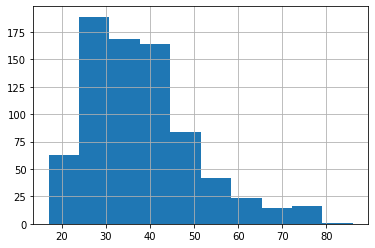

In [ ]:
def paso_a_int(x):
  try:
    return int(x)
  except:
    pass

pd.Series([paso_a_int(x) for x in ds['EDAD_ACUSADO/A AL MOMENTO DEL HECHO']]).hist()

##### Podemos ver que aunque los valores de esta variable se concentran entre 25 y 50 años, el dominio de la variable es bastante amplio. En base al análisis de este histograma y el conocimiento del dominio, proponemos transformar esta variable continua a una variable discreta con las siguientes categorías:

 -s/d
 -menos_de_18

 -entre_18_30

 -entre_30_40

 -entre_40_50
 
 -50_o_mas

In [ ]:
def nuevas_categorias_edad(x):
  """
  Esta función mapea valores a categorías. Puede tomar como input string casteables a int, o valores no casteables, que serán
  clasificados como 's/d'. Los valores serán agrupados según las siguientes categorías de edad:
  -s/d
 -menos_de_18
 -entre_18_30
 -entre_30_40
 -entre_40_50
 -50_o_mas

  Parámetros
  ----------
  x: str, int, float
    Para ser categorizado correctamente, el valor debe ser casteable a int, de lo contrario, la función lo categorizará como 's/d' 

  Salida
  ------
  str:
    Devuelve un string con la nueva categoría a la que fue mapeado el valor de entrada.

  """
  try:
    if int(x)<18:
      return 'menos_de_18'
    if int(x)<30:
      return 'entre_18_30'
    if int(x)<40:
      return 'entre_30_40'
    if int(x)<50:
      return 'entre_40_50'
    else:
      return '50_o_mas'
  except:
    return 's/d'


In [ ]:
###Genero nuevas categorías para la variable EDAD_ACUSADO/A AL MOMENTO DEL HECHO
vals = ds['EDAD_ACUSADO/A AL MOMENTO DEL HECHO'].apply(nuevas_categorias_edad)

In [ ]:
###Reviso los nuevos valores
vals.value_counts()

entre_30_40    254
entre_18_30    221
entre_40_50    178
50_o_mas       112
s/d             29
menos_de_18      1
Name: EDAD_ACUSADO/A AL MOMENTO DEL HECHO, dtype: int64

In [ ]:
###Reemplazo valores en la columna original
ds['EDAD_ACUSADO/A AL MOMENTO DEL HECHO'] = vals


#### Análisis y transformaciónde la variable "NIVEL_INSTRUCCION_ACUSADO/A"




In [ ]:
ds['NIVEL_INSTRUCCION_ACUSADO/A'].value_counts()

secundario_incompleto       223
s/d                         166
secundario_completo         144
primario_completo           117
primario_incompleto          33
terciario_incompleto         32
universitario_completo       24
terciario_completo           22
universitario_incompleto     18
universitario_en_curso        8
sin_instruccion               4
terciario_en_curso            3
no_corresponde                1
Name: NIVEL_INSTRUCCION_ACUSADO/A, dtype: int64

##### Esta variable, al igual que las anteriores, tiene muchas categorías que conviene reducir. Proponemos reordenar las observaciones en las siguientes categorías, donde el nivel indica el grado máximo de estudio completado:

 -s/d
 -sin_instruccion
 -primario_completo
 -secundario_completo
 -superior_completo

 Esta última categoría incluye tanto nivel universitario, como terciario. La categoría 'primario_incompleto' ha sido combinada con la categoría 'sin_instrucción'.

In [ ]:
mapeo_categorias = {'secundario_incompleto':'primario_completo', 
 'primario_incompleto':'sin_instruccion',
 'terciario_incompleto':'secundario_completo',
 'universitario_completo':'superior_completo',
 'terciario_completo':'superior_completo',
 'universitario_incompleto':'secundario_completo',
 'universitario_en_curso':'secundario_completo',
 'terciario_en_curso':'secundario_completo',
 'no_corresponde':'s/d'}

In [ ]:
###Reviso el mapeo
ds['NIVEL_INSTRUCCION_ACUSADO/A'].replace(to_replace=mapeo_categorias).value_counts()

primario_completo      340
secundario_completo    205
s/d                    167
superior_completo       46
sin_instruccion         37
Name: NIVEL_INSTRUCCION_ACUSADO/A, dtype: int64

In [ ]:
###Reemplazo en el dataset
ds['NIVEL_INSTRUCCION_ACUSADO/A'].replace(to_replace=mapeo_categorias, inplace=True)

#### Análisis y transformaciónde la variable "NACIONALIDAD_DENUNCIANTE"

In [ ]:
freq_cat(ds['NACIONALIDAD_DENUNCIANTE'])

,% Acum
Categoría,
argentina,76.603774
paraguaya,83.270440
boliviana,89.056604
peruana,94.088050
s/d,97.861635
venezolana,98.742138
Peruana,99.119497
ucraniana,99.496855
uruguaya,99.622642


##### Para esta variable vamos a aplicar los mismos criterios que se aplicaron para la variable 'NACIONALIDAD_DEL_ACUSADO/A'

Las nuevas categorías serán:
 -argentina
 -paraguaya
 -boliviana
 -peruana
 -otros 

In [ ]:
###Reemplazo las categorias
nuevas_categorias = ['argentina', 'paraguaya',  'boliviana', 'peruana']
ds['NACIONALIDAD_DENUNCIANTE'] = ds['NACIONALIDAD_DENUNCIANTE'].apply(lambda x: x if x in nuevas_categorias else 'otros')

In [ ]:
###Reviso las nuevas categorias
ds['NACIONALIDAD_DENUNCIANTE'].value_counts()

argentina    609
paraguaya     53
otros         47
boliviana     46
peruana       40
Name: NACIONALIDAD_DENUNCIANTE, dtype: int64

#### Análisis y transformaciónde la variable "EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO"



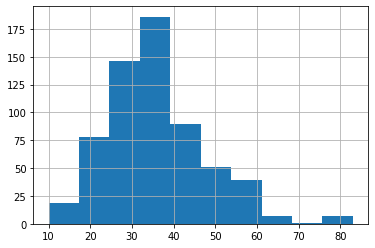

In [ ]:
def paso_a_int(x):
  try:
    return int(x)
  except:
    pass

pd.Series([paso_a_int(x) for x in ds['EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO']]).hist()

##### Para esta variable vamos a seguir los mismos criterios usados para transformar la variable 'EDAD_ACUSADO/A AL MOMENTO DEL HECHO'. Las nuevas categorías para esta variable serán:

##### -s/d
##### -menos_de_18
##### -entre_18_30
##### -entre_30_40
##### -entre_40_50
##### -50_o_mas



In [ ]:
###Genero nuevas categorías para la variable EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO
vals = ds['EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO'].apply(nuevas_categorias_edad)

In [ ]:
###Reviso las nuevas categorias
vals.value_counts()

entre_30_40    221
entre_18_30    189
s/d            171
entre_40_50    112
50_o_mas        83
menos_de_18     19
Name: EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO, dtype: int64

In [ ]:
###Reemplazo la variable en el dataset
ds['EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO'] = vals

#### Análisis y transformación de la variable FRECUENCIA_EPISODIOS

In [ ]:
freq_cat(ds['FRECUENCIA_EPISODIOS'])

,% Acum
Categoría,
habitual,63.899371
esporadico,78.993711
primera_vez,91.320755
eventual,96.855346
s/d,99.748428
diario,100.000000


##### Vamos a fusionar los niveles 'habitual' y 'diario' para reducir en uno la cantidad de categorías.


In [ ]:
ds.FRECUENCIA_EPISODIOS = ds.FRECUENCIA_EPISODIOS.apply(lambda x: 'habitual' if x == 'diario' else x)

In [ ]:
###Controlo la transformación
ds.FRECUENCIA_EPISODIOS.value_counts()

habitual       510
esporadico     120
primera_vez     98
eventual        44
s/d             23
Name: FRECUENCIA_EPISODIOS, dtype: int64

#### Análisis y transformación de la variable RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE

In [ ]:
freq_cat(ds['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'])

,% Acum
Categoría,
ex_pareja,64.402516
pareja,77.735849
familiar,83.522013
vecino/a,88.805031
ninguna,93.836478
familiar_de_ex_pareja,95.220126
s/d,96.603774
compañero/a_de_trabajo,97.861635
familiar_de_pareja,98.993711


##### Para esta variable vamos a mantener 4 categorías. Las nuevas categorías serán:

 -pareja
 -ex_pareja
 -familiar
 -otros

Para evitar introducir ruido, fusionaremos la categoría 's/d' con 'otros'.

In [ ]:
### Reemplazo las categorias
nuevas_categorias = ['pareja', 'ex_pareja',  'familiar']
ds['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'] = ds['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'].apply(lambda x: x if x in nuevas_categorias else 'otros')

In [ ]:
### Reviso las nuevas categorías generadas
ds['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'].value_counts()

ex_pareja    512
otros        131
pareja       106
familiar      46
Name: RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE, dtype: int64

#### Análisis y transformación de la variable HIJOS_HIJAS_EN_COMUN

In [ ]:
ds.HIJOS_HIJAS_EN_COMUN.value_counts()

si     459
no     316
s/d     17
NO       2
SI       1
Name: HIJOS_HIJAS_EN_COMUN, dtype: int64

##### Mantenemos las tres categorías, pero vamos a corregir los registros que tienen mayúscula.



In [ ]:
ds.HIJOS_HIJAS_EN_COMUN = ds.HIJOS_HIJAS_EN_COMUN.str.lower()

In [ ]:
### Revisamos la transformación
ds.HIJOS_HIJAS_EN_COMUN.value_counts()

si     460
no     318
s/d     17
Name: HIJOS_HIJAS_EN_COMUN, dtype: int64

#### Análisis y transformación de la variable MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO

In [ ]:
ds.MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO.value_counts()

no     669
si     109
s/d     15
NO       2
Name: MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO, dtype: int64

##### Mantenemos las tres categorías, pero vamos a corregir los registros que tienen mayúscula.

In [ ]:
ds.MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO = ds.MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO.str.lower()

In [ ]:
### Revisamos la transformación
ds.MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO.value_counts()

no     671
si     109
s/d     15
Name: MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO, dtype: int64

#### Análisis y transformación de la variable TIPO_DE_RESOLUCION

In [ ]:
freq_cat(ds.TIPO_DE_RESOLUCION)

,% Acum
Categoría,
interlocutoria,78.616352
definitiva,100.000000


##### Mantenemos las categorías sin transformación

#### Análisis y transformación de la variable OBJETO_DE_LA_RESOLUCION 

In [ ]:
freq_cat(ds.OBJETO_DE_LA_RESOLUCION)

,% Acum
Categoría,
suspension_del_proceso_a_prueba,34.968553
cuestion_de_competencia,51.698113
admisibilidad_prueba,58.490566
medida_cautelar,65.157233
medida_probatoria,71.446541
juicio_abreviado,77.484277
ejecucion_de_la_pena,82.138365
mediacion,84.528302
prescripcion,86.415094


In [ ]:
###Cuento la cantidad de niveles de la variable
len(ds['OBJETO_DE_LA_RESOLUCION'].unique())

40

##### Para esta variable vamos a mantener 7 categorías. Las nuevas variables serán:

 -suspension_del_proceso_a_prueba

 -cuestion_de_competencia

 -medida_cautelar

 -admisibilidad_prueba

 -medida_probatoria

 -juicio_abreviado

 -otros


In [ ]:
### Reemplazo las categorias
nuevas_categorias = ['suspension_del_proceso_a_prueba', 'cuestion_de_competencia',  'medida_cautelar', 'admisibilidad_prueba','medida_probatoria', 'juicio_abreviado']
ds.OBJETO_DE_LA_RESOLUCION = ds.OBJETO_DE_LA_RESOLUCION.apply(lambda x: x if x in nuevas_categorias else 'otros')

In [ ]:
### Reviso la transformación
ds.OBJETO_DE_LA_RESOLUCION.value_counts()

suspension_del_proceso_a_prueba    278
otros                              179
cuestion_de_competencia            133
admisibilidad_prueba                54
medida_cautelar                     53
medida_probatoria                   50
juicio_abreviado                    48
Name: OBJETO_DE_LA_RESOLUCION, dtype: int64

#### Analisis y transformación de la variable 'DETALLE'

In [ ]:
freq_cat(ds.DETALLE)

,% Acum
Categoría,
admisibilidad,12.704403
extincion_accion_sobreseimiento,23.396226
incompetencia_en_razon_de_materia,30.566038
prorroga,37.484277
allanamiento,42.515723
modifica_pauta_de_conducta,45.408805
rechaza_competencia,48.176101
mantiene,50.566038
incompetencia_en_razon_de_conexidad,52.704403


In [ ]:
###Cuento la cantidad de niveles de la variable
len(ds.DETALLE.unique())

114

 Vemos que son muchas categorías, y existe una distribución relativamente uniforme de las observaciones, al menos entre las principales. Esto dificulta la reducción a un número aceptable de nuevas categorías. Por ello, y para evitar incorporar ruido excesivo a la salida, por el momento evitaremos trabajar con esta variable, y no la presentaremos al público.

In [ ]:
ds.drop(columns=['DETALLE'], inplace = True)

#### Análisis y transformación de la variable 'DECISION'

In [ ]:
ds.DECISION.value_counts()

hace_lugar       685
no_hace_lugar    109
Name: DECISION, dtype: int64

##### Mantenemos las categorías como aparecen

##2.1.3 Evaluación de las transformaciones realizadas

En este punto probablemente nos estemos preguntando cuál es el incremento en la calidad de la información resultante como resultado de las transformaciones realizadas. Para responder este interrogante, podemos comparar la divergencia de KL y el error absoluto aplicando DP antes y después de las transformaciones propuestas.

Para facilitar la comparación, las variables continuas que refieren a la edad serán transformadas como se hizo durante el procesamiento anterior. Asimismo, las variables en las que habían categorías escritas en minúscula y mayúscula serán homogeneizadas como se hizo anteriormente.

Para aplicar DP utilizaremos un budegt fijo de 5 epsilons, que se distribuirá proporcionalmente entre cada feature. Realizaremos 100 simulaciones, para llegar a resultados más robustos.

In [ ]:
###Carguemos nuevamente el dataset original
ds_original = pd.read_csv('/content/gdrive/MyDrive/dataset_vio_gen.csv', index_col=0)

In [ ]:
###Genero nuevas categorías para la variable EDAD_ACUSADO/A AL MOMENTO DEL HECHO
ds_original['EDAD_ACUSADO/A AL MOMENTO DEL HECHO'] = ds_original['EDAD_ACUSADO/A AL MOMENTO DEL HECHO'].apply(nuevas_categorias_edad)

In [ ]:
###Genero nuevas categorías para la variable EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO
ds_original['EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO'] = ds['EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO'].apply(nuevas_categorias_edad)

In [ ]:
###Cambio mayúsculas por minúsculas
ds_original.HIJOS_HIJAS_EN_COMUN = ds_original.HIJOS_HIJAS_EN_COMUN.str.lower()
ds_original.MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO = ds_original.MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO.str.lower()
ds_original.V_FISICA = ds_original.V_FISICA.str.lower()

In [ ]:
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    q= np.where(q == 0, 0.000000001, q)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
### Computo medidas de divergencia KL y error absoluto sobre el dataset original
budget = 5
epsilon = budget/len(ds_original.columns)###Distribuyo budget entre los features
divergencia_kl_igual_budget_prepro = []
error_absoluto_igual_budget_prepro = []

for i in range(0,100):
  div_kl_hist = []
  error_abs_hist = []

  for (columnName, columnData) in ds_original.iteritems():
    codes = pd.Categorical(columnData).codes ###Extraigo la codificación numérica correspondiente a cada categoría. Es necesario para el funcionamiento de la función np.histogram
    n_cat = len(np.unique(codes))###Calculo la cantidad de bins que tendrá el histograma, que será uno por categoría de la variable.

    ###CON DP
    dp_hist, dp_bins = dp.tools.histogram(codes, epsilon=epsilon , delta=0, sens=len(ds_original.columns), bins=n_cat)

    ###Sin DP
    hist, bins = np.histogram(codes, bins=n_cat)
    hist = hist / hist.sum()

    ###Error
    div_kl_hist.append(kl(hist, dp_hist))
    error_abs_hist.append(np.abs(hist - dp_hist).sum())

  divergencia_kl_igual_budget_prepro.append(div_kl_hist)
  error_absoluto_igual_budget_prepro.append(error_abs_hist)
divergencia_kl_igual_budget_prepro = np.mean(divergencia_kl_igual_budget_prepro, axis=0)
error_absoluto_igual_budget_prepro = np.mean(error_absoluto_igual_budget_prepro, axis=0)

In [ ]:
### Computo medidas de divergencia KL y error absoluto sobre el dataset luego de las transformaciones aplicadas
budget = 5
epsilon = budget/len(ds.columns)###Distribuyo budget entre los features
divergencia_kl_igual_budget = []
error_absoluto_igual_budget = []
for i in range(0,100):
  div_kl_hist = []
  error_abs_hist = []

  for (columnName, columnData) in ds.iteritems():
    codes = pd.Categorical(columnData).codes###Extraigo la codificación numérica correspondiente a cada categoría. Es necesario para el funcionamiento de la función np.histogram
    n_cat = len(np.unique(codes))###Calculo la cantidad de bins que tendrá el histograma, que será uno por categoría de la variable.

    ###CON DP
    dp_hist, dp_bins = dp.tools.histogram(codes, epsilon=epsilon ,delta=0, sens=len(ds.columns), bins=n_cat)

    ###Sin DP
    hist, bins = np.histogram(codes, bins=n_cat)
    hist = hist / hist.sum()

    ###Error
    div_kl_hist.append(kl(hist, dp_hist))
    error_abs_hist.append(np.abs(hist - dp_hist).sum())

  divergencia_kl_igual_budget.append(div_kl_hist)
  error_absoluto_igual_budget.append(error_abs_hist)
divergencia_kl_igual_budget = np.mean(divergencia_kl_igual_budget, axis=0)
error_absoluto_igual_budget = np.mean(error_absoluto_igual_budget, axis=0)

In [ ]:
###Analizamos la salida
print('Divergencia KL promedio por feature entre el histograma original y uno creado aplicando DP - Antes de hacer ingeniería de atributos: ' + str(np.mean(divergencia_kl_igual_budget_prepro)))
print('Divergencia KL promedio por feature entre el histograma original y uno creado aplicando DP - Después de hacer ingeniería de atributos: ' + str(np.mean(divergencia_kl_igual_budget)))
print('')
print('Error absoluto promedio por feature entre el histograma original y uno creado aplicando DP - Antes de hacer ingeniería de atributos: ' + str(np.mean(error_absoluto_igual_budget_prepro)))
print('Error absoluto promedio por feature entre el histograma original y uno creado aplicando DP - Después de hacer ingeniería de atributos: ' + str(np.mean(error_absoluto_igual_budget)))



Divergencia KL promedio por feature entre el histograma original y uno creado aplicando DP - Antes de hacer ingeniería de atributos: 1.867678476424278
Divergencia KL promedio por feature entre el histograma original y uno creado aplicando DP - Después de hacer ingeniería de atributos: 0.6139022271205036

Error absoluto promedio por feature entre el histograma original y uno creado aplicando DP - Antes de hacer ingeniería de atributos: 0.5905140539224923
Error absoluto promedio por feature entre el histograma original y uno creado aplicando DP - Después de hacer ingeniería de atributos: 0.24552057719318862


Text(0.5, 0.98, 'Métricas de error promedio del mecanismo de DP  antes y después de aplicar ingeniería de atributos sobre el dataset')

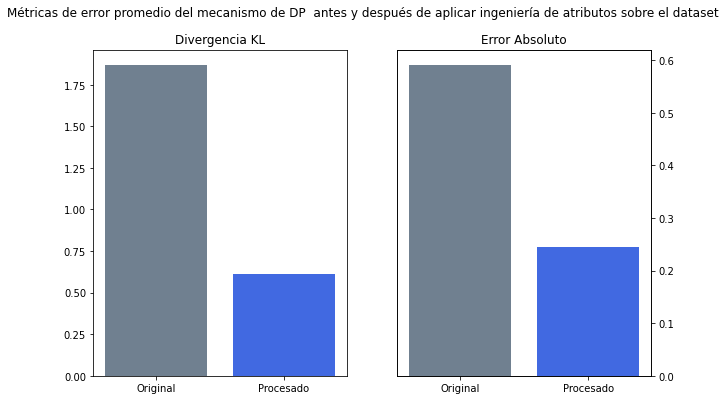

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))


ax[0].bar(x=[1,2], height=[np.mean(divergencia_kl_igual_budget_prepro), np.mean(divergencia_kl_igual_budget)], color = ['slategray', 'royalblue'])
twinx = ax[1].twinx()
twinx.bar(x=[1,2], height=[np.mean(error_absoluto_igual_budget_prepro), np.mean(error_absoluto_igual_budget)], color = ['slategray', 'royalblue'])

ax[0].set_xticks([1,2])
ax[0].set_xticklabels(['Original', 'Procesado'])
ax[0].set_title('Divergencia KL')

twinx.set_xticks([1,2])
twinx.set_xticklabels(['Original', 'Procesado'])

ax[1].set_yticks([])
twinx.set_title('Error Absoluto')

fig.suptitle('Métricas de error promedio del mecanismo de DP  antes y después de aplicar ingeniería de atributos sobre el dataset')

 Vemos que aunque las transformaciones que introducimos significaron la eliminación de ciertas categorías (perdiendo así cierta información), la calidad de la información que se mantuvo mejoró sustancialmente. Ambas medidas de error utilizadas, tanto la divergencia KL, como el error absoluto, fueron muy inferiores luego de aplicadas las transformaciones. 

 Esto es esperable, ya que el ruido aumenta con la cantidad de features y de categorías. Por ello, es importante hacer un buen análisis de los features que se van a publicar y la construcción de las categorías de los mismos.


In [ ]:
###Guardamos el csv procesado
ds.to_csv('/content/gdrive/MyDrive/dataset_vio_gen_pro.csv')

## 2.1.4 Ahora sí! Hemos terminado el análisis y transformación de las variables. Seguiremos con la optimización de los mecanismos de DP en el notebook 2.2